# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1716928139238.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,05/24/2024,5304.72,5281.45,5311.65,5278.39
1,05/23/2024,5267.84,5340.26,5341.88,5256.93
2,05/22/2024,5307.01,5319.28,5323.18,5286.01
3,05/21/2024,5321.41,5298.69,5324.32,5297.87
4,05/20/2024,5308.13,5305.35,5325.32,5302.40
...,...,...,...,...,...
2525,06/03/2014,1924.24,1923.07,1925.07,1918.79
2526,06/02/2014,1924.97,1923.87,1925.88,1915.98
2527,05/30/2014,1923.57,1920.33,1924.03,1916.64
2528,05/29/2014,1920.03,1910.60,1920.03,1909.82


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2530.000000,2530.000000,2530.000000,2530.000000
mean,3128.682917,3117.601976,3134.289625,3099.718055
std,956.207293,978.736865,984.561999,972.946555
min,1829.080000,0.000000,0.000000,0.000000
25%,2183.915000,2183.745000,2187.187500,2178.012500
50%,2871.200000,2866.280000,2885.110000,2854.130000
75%,4017.807500,4020.287500,4049.772500,3984.550000
max,5321.410000,5340.260000,5341.880000,5302.400000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3134.250326,3133.704013,3150.477851,3115.727723
std,955.514326,955.194387,960.911048,949.533860
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2191.950000,2191.120000,2198.700000,2187.440000
50%,2876.320000,2871.570000,2889.450000,2856.050000
75%,4019.870000,4026.130000,4052.450000,3992.780000
max,5321.410000,5340.260000,5341.880000,5302.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2529
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

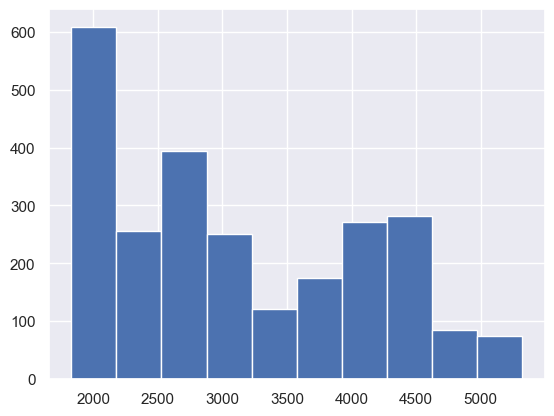

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5304.72

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3134.2503257846715

In [10]:
close_sd = df['Close/Last'].std()
close_sd

955.5143264024803

In [11]:
sigma1 = close_mean + close_sd
sigma1

4089.764652187152

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5045.278978589632

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5523.036141790872

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2529
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-05-28 to 2024-05-24')

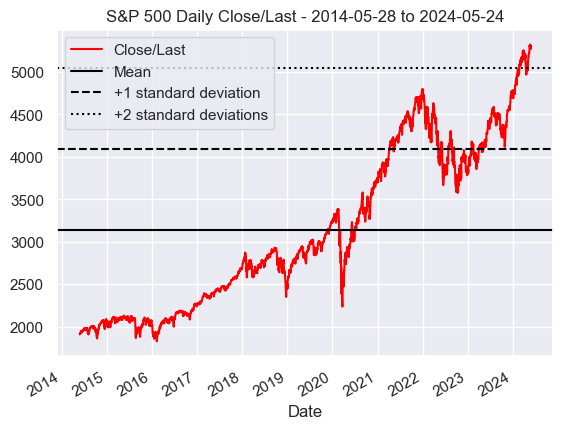

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-05-28 to 2024-05-24')

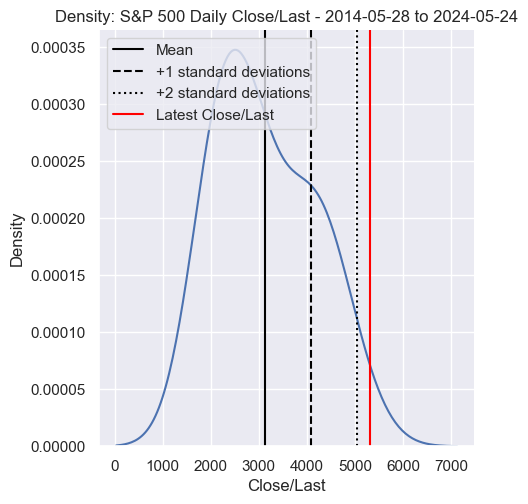

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.271519760867601

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results